In [1]:
# Importing everything
from qiskit import QuantumCircuit
from qiskit import IBMQ, Aer
from qiskit.visualization import plot_histogram
%matplotlib inline

In [2]:
    qc = QuantumCircuit(2) # Declare a Circuit with 2 qubits
    qc.h(1)
    qc.cx(1, 0)
    # make a bell state pair of these two qubits
    qc.barrier()
    qc.draw()

┌───┐ ░ 
q_0: ─────┤ X ├─░─
     ┌───┐└─┬─┘ ░ 
q_1: ┤ H ├──■───░─
     └───┘      ░

In [3]:
 # input the  data that needs to be sent
data= str(input())

01


In [4]:
    if data[1] == "1": # if q1 has 1 apply x gate
        qc.x(1)
    if data[0] == "1": #if q0 has 1 apply z gate
        qc.z(1)
    qc.barrier()
    qc.draw()

┌───┐ ░       ░ 
q_0: ─────┤ X ├─░───────░─
     ┌───┐└─┬─┘ ░ ┌───┐ ░ 
q_1: ┤ H ├──■───░─┤ X ├─░─
     └───┘      ░ └───┘ ░

In [5]:
# collapse the bell state
qc.cx(1,0)
qc.h(1)
# measure the qubits on classical bits
qc.measure_all()
qc.draw()

┌───┐ ░       ░ ┌───┐      ░ ┌─┐   
   q_0: ─────┤ X ├─░───────░─┤ X ├──────░─┤M├───
        ┌───┐└─┬─┘ ░ ┌───┐ ░ └─┬─┘┌───┐ ░ └╥┘┌─┐
   q_1: ┤ H ├──■───░─┤ X ├─░───■──┤ H ├─░──╫─┤M├
        └───┘      ░ └───┘ ░      └───┘ ░  ║ └╥┘
meas: 2/═══════════════════════════════════╩══╩═
                                           0  1

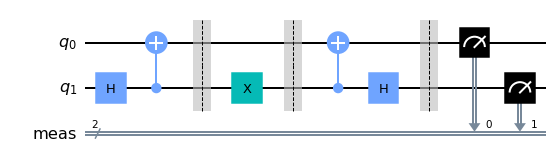

In [6]:
qc.draw(output='mpl')
# used matplotlib to plot the circuit

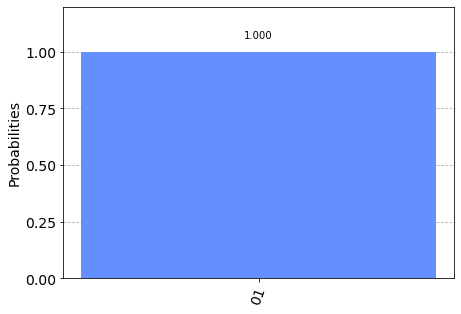

In [7]:
# use the aer_simulator to simulate the sending and receiving of the information and determining the accuracy of the data received
backend=Aer.get_backend('aer_simulator')
result=backend.run(qc,shots=1000).result() # ran the test 1000 times for better accuracy
counts=result.get_counts()
plot_histogram(counts)